In [1]:
#nltk.download()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud # pip install wordcloud

%matplotlib inline  

%run 'dataset.py'
%run 'processing.py'

In [ ]:
ds = DataSet()
ds.load()

tokens = Processing.get_tokens(ds.df['Utterance'], [Processing.remove_punctuation], [Processing.remove_stopwords])

allWordDist = nltk.FreqDist(tokens)

common_words = allWordDist.most_common(100)

# Print the top 10 words - shows some 'olde english' stop words
print(allWordDist.most_common(10))

words = ' '.join(entry[0] for entry in common_words)


# lower max_font_size
wordcloud = WordCloud(background_color='white', max_font_size=60,height=600, width=1200).generate(words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png', dpi=200)

# POS Tagging

Part Of Speech (POS) tagging allows us to identify the structure of the sentence. This is particularly useful in removing proper nouns, such as people's names. For example, whenever we ranked the words earlier the word MacBeth scores quite highly in the play MacBeth. This doesn't give us a lot of information, so it may be useful to remove people's names. 

We use pos_tag from NLTK to remove the proper nouns ('NNP') from all the plays. Our results are disappionting: we do indeed remove macbeth, but would also remove countries such as Scotland, England, Ireland and other words that definately aren't proper nouns: show, began, which, speak, witch. Macbeth without witches would be a tragedy!

In [4]:
plays_utterances = ds.get_by_play()

In [5]:
# Strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
# Requires average_perceptron_tagger from NLTK download
from nltk.tag import pos_tag

for title, text in plays_utterances.items():
    tokens = nltk.word_tokenize(text)
    tagged = pos_tag(tokens) #use NLTK's part of speech tagger
    propernouns = [word for word,pos in tagged if pos == 'NNP' ]

    
    if( title == 'macbeth'):
        print('Play: Macbeth')
        print('Proper Nouns: ',propernouns)



Play: Macbeth
Proper Nouns:  ['Macbeth', 'Graymalkin', 'Paddock', 'Anon', 'Fair', 'Hover', 'Who', 'Hail', 'Say', 'Macdonwald', 'Do', 'Show', 'Macbeth', 'Disdaining', 'Which', 'Till', 'Which', 'Till', 'O', 'Discomfort', 'Mark', 'Scotland', 'Norweyan', 'Began', 'Dismay', 'Macbeth', 'Banquo', 'Or', 'Golgotha', 'Go', 'Ross', 'God', 'Whence', 'Fife', 'Norweyan', 'Norway', 'Cawdor', 'Till', 'Bellona', 'Point', 'Great', 'Sweno', 'Norways', 'Till', 'Saint', 'Colme', 'Cawdor', 'Macbeth', 'Macbeth', 'Sister', "'d", "'d", 'Aleppo', "Thou'rt", 'Hang', 'Shall', 'Wreck', 'Macbeth', 'Posters', 'Thus', 'Speak', 'Macbeth', 'Glamis', 'Macbeth', 'Cawdor', 'Macbeth', 'Are', 'ye', 'Which', 'Speak', 'Macbeth', 'Thou', 'Macbeth', 'Banquo', 'Banquo', 'Macbeth', 'Stay', 'Sinel', 'Glamis', 'Cawdor', 'Cawdor', 'A', 'Stands', 'No', 'Cawdor', 'Say', 'Speak', 'Cawdor', 'Macbeth', 'Thy', 'Which', 'Norweyan', 'Strange', 'As', 'Came', 'Thy', 'Cawdor', 'Cawdor', 'Who', 'Which', 'Norway', 'Glamis', 'Cawdor', 'Cawdor', '

In [6]:
sentence = "Michael Jackson likes to eat at McDonalds"
tagged_sent = pos_tag(tokens)
# [('Michael', 'NNP'), ('Jackson', 'NNP'), ('likes', 'VBZ'), ('to', 'TO'), ('eat', 'VB'), ('at', 'IN'), ('McDonalds', 'NNP')]

propernouns = [word for word,pos in tagged_sent if pos == 'NNP']
# ['Michael','Jackson', 'McDonalds']

In [7]:
print(propernouns)

['Ay', 'Which', 'See', 'Magic', 'Hath', 'O', "'t", 'Nay', 'O', 'Lord', 'Timon', 'Which', 'Provokes', 'So', 'Indifferent', 'Whom', 'Halts', 'As', 'Lord', 'Timon', 'Subdues', 'Apemantus', 'Than', 'Most', 'Timon', 'Sir', 'Feign', 'Is', 'Whose', 'Lord', 'Timon', 'Whom', 'Fortune', 'Whose', 'Fortune', 'Nay', 'Follow', 'Rain', 'Make', 'Ay', 'Fortune', 'Spurns', 'Which', 'Fortune', 'Lord', 'Timon', 'Imprison', 'Ay', 'Periods', 'Well', 'Fare', 'Lord', 'Timon', 'Thou', 'Lucilius', 'Timon', 'Lord', 'Timon', 'Than', 'Attempts', 'Join', 'Myself', 'Timon', 'Ay', 'Mine', "'d", "'t", 'Pawn', 'Humbly', 'Which', 'Go', 'Painting', 'Till', 'Well', 'Sir', 'Hath', 'My', 'Things', 'Well', "'d", 'Which', 'Look', 'Apemantus', 'Till', 'Timon', 'Apemantus', 'Thou', 'Thou', 'Apemantus', 'Timon', 'Whither', 'Right', 'Apemantus', 'Thy', 'Wilt', 'Apemantus', 'No', 'O', 'Apemantus', 'Thou', 'Art', 'Heavens', 'Apemantus', "E'en", 'Apemantus', 'Ay', 'Art', 'Ay', 'Apemantus', 'Traffic', 'Traffic', 'Alcibiades', 'Pray',

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.snowball import SnowballStemmer




stemmer = SnowballStemmer("english")


def run_tfidf(words, stem=False):
    all_stopwords = stopwords.words('english') 

    #adding Shakespeare-ean stop-words
    shaksp_stopwords = ('thee', 'thou', 'thy', 'thine')
    all_stopwords += shaksp_stopwords

    tfidf_vectorizer = TfidfVectorizer(#max_features=200000,
                                        max_features=1000,
                                       min_df=0.2, 
                                       max_df=0.8, 
                                       stop_words=all_stopwords,
                                        use_idf=True, 
                                        tokenizer=tokenize_and_stem if stem else tokenize_only, 
                                        ngram_range=(1,3))

    tfidf_matrix = tfidf_vectorizer.fit_transform(words)
    
    return tfidf_matrix, tfidf_vectorizer.get_feature_names()


def strip_proppers_POS(tokens):
    tagged = pos_tag(tokens) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

    
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems



def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    filtered_tokens = strip_proppers_POS(filtered_tokens)
    
    return filtered_tokens    
    


In [9]:


tfidf_matrix, terms = run_tfidf(plays_utterances.values())

# KMeans

In [31]:
from sklearn.cluster import KMeans
from collections import Counter
import pickle



max_iters = [1, 10, 100, 300, 1000, 10000]
n_inits = [1, 5, 10, 50, 100]

for max_iter in max_iters:
    print('Max iter: ', max_iter)
    for n_init in n_inits:
        print('n_init: ', n_init)
        
        kms = []
        range_clusters = range(1, len(plays_utterances))
        for num_clusters in range_clusters:
            print('KMeans cluster ',num_clusters)

            km = KMeans(n_clusters=num_clusters,
                        max_iter=max_iter,             # Default is 300
                        n_init=n_init,                 # Default is 10
                        precompute_distances=True, # Faster but takes more memory
                        random_state=47,
                        n_jobs=-1)

            km.fit(tfidf_matrix)

            cluster_centers = km.cluster_centers_

            clusters = km.labels_.tolist()

            kms.append({'num_clusters': num_clusters, 
                        'cluster_centers':km.cluster_centers_, 
                        'clusters':km.labels_.tolist(), 
                        'inertia':km.inertia_})

        kms_df = pd.DataFrame(kms, index=range_clusters)
        kms_df.to_pickle('kms_{}_{}.pickle'.format(max_iter, n_init))

Max iter:  1
n_init:  1
KMeans cluster  1
KMeans cluster  2
KMeans cluster  3
KMeans cluster  4
KMeans cluster  5
KMeans cluster  6
KMeans cluster  7
KMeans cluster  8
KMeans cluster  9
KMeans cluster  10
KMeans cluster  11
KMeans cluster  12
KMeans cluster  13
KMeans cluster  14
KMeans cluster  15
KMeans cluster  16
KMeans cluster  17
KMeans cluster  18
KMeans cluster  19
KMeans cluster  20
KMeans cluster  21
KMeans cluster  22
KMeans cluster  23
KMeans cluster  24
KMeans cluster  25
KMeans cluster  26
KMeans cluster  27
KMeans cluster  28
KMeans cluster  29
KMeans cluster  30
KMeans cluster  31
KMeans cluster  32
KMeans cluster  33
KMeans cluster  34
KMeans cluster  35
KMeans cluster  36
n_init:  5
KMeans cluster  1
KMeans cluster  2
KMeans cluster  3
KMeans cluster  4
KMeans cluster  5
KMeans cluster  6
KMeans cluster  7
KMeans cluster  8
KMeans cluster  9
KMeans cluster  10
KMeans cluster  11
KMeans cluster  12
KMeans cluster  13
KMeans cluster  14
KMeans cluster  15
KMeans cluster

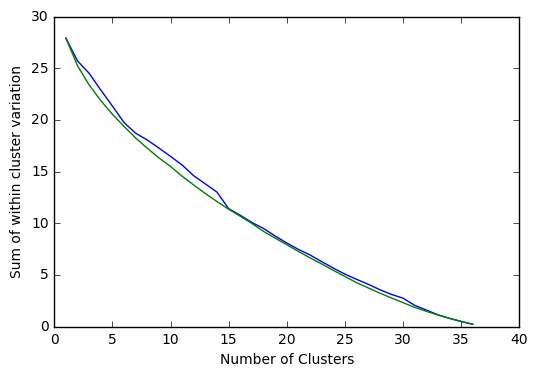

In [39]:
kms_df1_1 = pd.read_pickle('km_byplay/kms_1_1.pickle')
kms_df10000_100 = pd.read_pickle('km_byplay/kms_10000_100.pickle')

fig, ax = plt.subplots()
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of within cluster variation')
plt.plot(kms_df.num_clusters, kms_df1_1.inertia)
plt.plot(kms_df.num_clusters, kms_df10000_100.inertia)
plt.savefig('km_inertia_both.png', dpi=200)
plt.show()


In [ ]:

plays_dict = { 'title': list(plays_utterances.keys()),'cluster': clusters}

frame = pd.DataFrame(plays_dict, index = [clusters] , columns = [
        'title', 'cluster'])


In [ ]:
frame['cluster'].value_counts()

In [ ]:

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in plays_utterances.values():
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)


In [ ]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    
    print("Cluster {} words:".format(i))
    for ind in order_centroids[i, :10]:
        print(' {}'.format(terms[ind]))
    print()
    
    print("Cluster {} titles:".format(i))
    for title in frame.ix[i]['title'].values.tolist():
        print(' {},'.format(title))
    print()
    print()

# MDS

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: '0', 
                 1: '1', 
                 2: '2', 
                 3: '3', 
                 4: '4'}

In [ ]:
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=frame['cluster'], title=frame['title'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that we use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i, row in df.iterrows():
    ax.text(row['x'], row['y'], row['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

# Hierarchical Document Clustering

In [ ]:
print(dist)

In [23]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=list(frame.title));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.show()

NameError: name 'dist' is not defined

# Self Organising Map

In [ ]:
from mvpa2.suite import *

som = SimpleSOMMapper((20, 30), 400, learning_rate=0.05)
som.train()

# Silhouette Plots

# Purity Measures, Contingenct Tables, Entropy

# PCA